In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("data/finaldataset.csv")
df.head(5)

,Unnamed: 0,Year,Kilometers_Driven,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Price
0,0,10,72000,Mumbai,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,1750
1,1,5,41000,Pune,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,12500
2,2,9,46000,Chennai,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,4500
3,3,8,87000,Chennai,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,6000
4,4,7,40670,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,17740


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6017 non-null   int64  
 1   Year               6017 non-null   int64  
 2   Kilometers_Driven  6017 non-null   int64  
 3   Location           6017 non-null   object 
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6017 non-null   float64
 9   Power              6017 non-null   float64
 10  Seats              6017 non-null   float64
 11  Manufacturer       6017 non-null   object 
 12  Price              6017 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 611.2+ KB


In [4]:
X = df[[ 'Year', 'Kilometers_Driven','Mileage','Engine','Power','Seats','Manufacturer','Location','Fuel_Type', 'Transmission','Owner_Type']]

In [5]:
X.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer,Location,Fuel_Type,Transmission,Owner_Type
0,10,72000,26.60,998.0,58.16,5.0,Maruti,Mumbai,CNG,Manual,First
1,5,41000,19.67,1582.0,126.20,5.0,Hyundai,Pune,Diesel,Manual,First
2,9,46000,18.20,1199.0,88.70,5.0,Honda,Chennai,Petrol,Manual,First
3,8,87000,20.77,1248.0,88.76,7.0,Maruti,Chennai,Diesel,Manual,First
4,7,40670,15.20,1968.0,140.80,5.0,Audi,Coimbatore,Diesel,Automatic,Second


In [6]:
Y = df.Price
X = pd.get_dummies(data=X) 

In [7]:
X.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,10,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,5,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,9,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,8,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,7,40670,15.20,1968.0,140.80,5.0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 42)


In [14]:
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))


print('RMSE: ',rmse)


print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  4892.404517863007
Variance score: 0.81


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


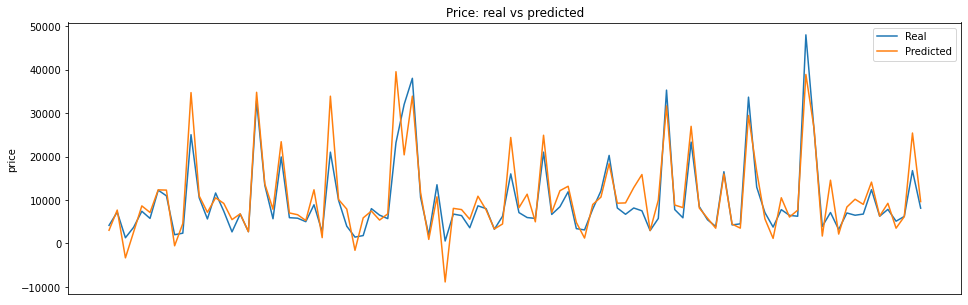

In [10]:
#So sánh giá trị dự đoán với giá trị thực tế
A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

In [19]:
#Tiến hành dự đoán thử với 1 dữ liệu

user_input = { 'Year':5, 'Kilometers_Driven':41000, 
              'Mileage':19.67,'Engine':1582.0,'Power':126.20,'Seats':5.0,
              'Manufacturer':"Hyundai",'Fuel_Type':"Diesel", 
              'Transmission':"Manual"}
def input_to_one_hot(data):
    # Khởi tạo vecto giá trị 0
    enc_input = np.zeros(59)
    # đầu vào theo thứ tự
    enc_input[0] = data['Year']
    enc_input[1] = data['Kilometers_Driven']
    enc_input[2] = data['Mileage']
    enc_input[3] = data['Engine']
    enc_input[4] = data['Power']
    enc_input[5] = data['Seats']

      
    
    

   
    ##################### Manufacturer #########################
    # xác định lại đầu vào để khớp với tên cột
    redefinded_user_input = 'Manufacturer_'+data['Manufacturer']
    # tìm kiếm chỉ mục trong danh sách tên cột
    Manufacturer_column_index = X.columns.tolist().index(redefinded_user_input)
    # hoàn thành chỉ số tìm thấy với 1
    enc_input[Manufacturer_column_index] = 1
    
    
    ##################### Location #########################
    # xác định lại đầu vào để khớp với tên cột
    redefinded_user_input = 'Location_'+data['Location']
    # tìm kiếm chỉ mục trong danh sách tên cột
    Location_column_index = X.columns.tolist().index(redefinded_user_input)
    # hoàn thành chỉ số tìm thấy với 1
    enc_input[Location_column_index] = 1
    
    
    ##################### Fuel_Type ####################
    #xác định lại đầu vào để khớp với tên cột
    redefinded_user_input = 'Fuel_Type_'+data['Fuel_Type']
    # tìm kiếm chỉ mục trong danh sách tên cột
    Fuel_Type_column_index = X.columns.tolist().index(redefinded_user_input)
    # hoàn thành chỉ số tìm thấy với 1
    enc_input[Fuel_Type_column_index] = 1
    
    
    ##################### Transmission ####################
    
    redefinded_user_input = 'Transmission_'+data['Transmission']
     
    Transmission_column_index = X.columns.tolist().index(redefinded_user_input)
    
    enc_input[Transmission_column_index] = 1

    return enc_input


    ##################### Owner_Type ####################
    
    redefinded_user_input = 'Owner_Type_'+data['Owner_Type']
     
    Owner_Type_column_index = X.columns.tolist().index(redefinded_user_input)
    
    enc_input[Owner_Type_column_index] = 1

    return enc_input

In [20]:
#Tiến hành dự đoán với xe có các thuộc tính sau 
user_input = { 'Year':5, 'Kilometers_Driven':41000, 
              'Mileage':19.67,'Engine':1582.0,'Power':126.20,'Seats':5.0,
              'Manufacturer':"Hyundai", "Location":"Pune",'Fuel_Type':"Diesel", 
              'Transmission':"Manual",'Owner_Type':'First'}
# Với giá thực tế là 11000
a = input_to_one_hot(user_input)

In [21]:
price_pred = regr.predict([a])
print(price_pred)

[11422.94589717]
